# **Problem Statment**

Let’s consider a Company dataset with around 10 variables and 400 records and build the model using Decision Tree.

The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not


**Business Problem:**

A cloth manufacturing company is interested to know about the segment or attributes causes high sale

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [3]:
df=pd.read_csv('Company_Data.csv')

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.shape

(400, 11)

# **Performing EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [9]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

**As we can see above there are no null values in our dataset.**

<Axes: >

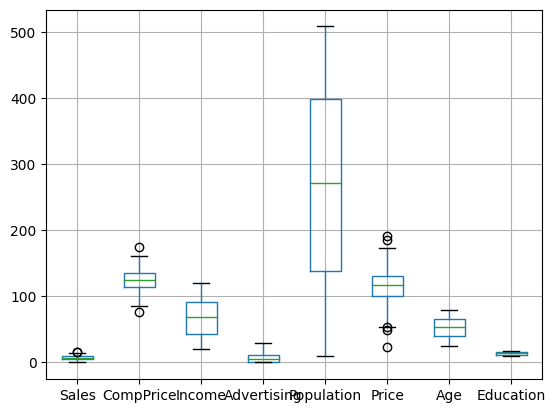

In [10]:
df.boxplot()

**As we can see above there are no much outliers in our dataset.**

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


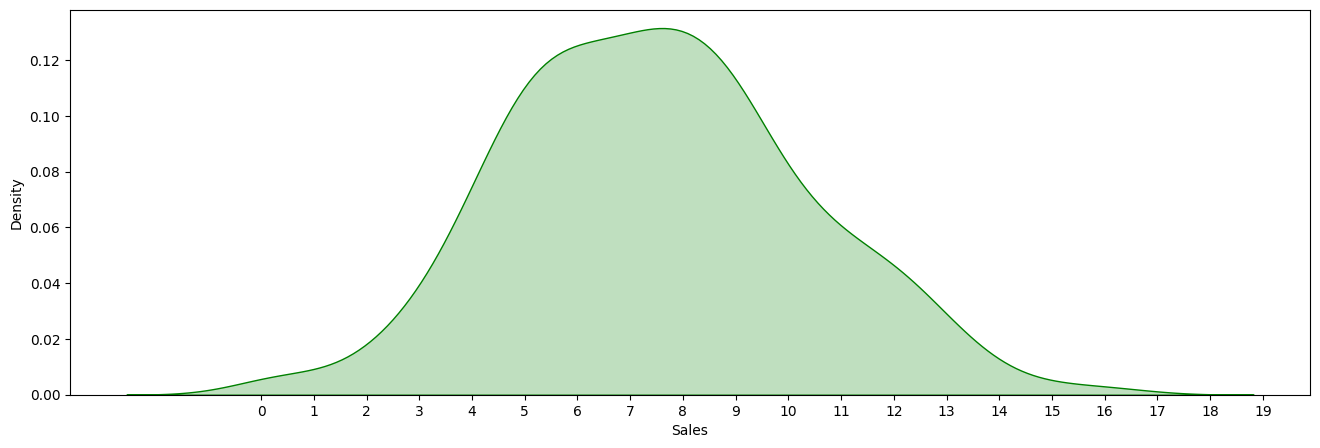

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

**The data is Skwed on the right.**

**The data has negative Kurtosis.**

In [13]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

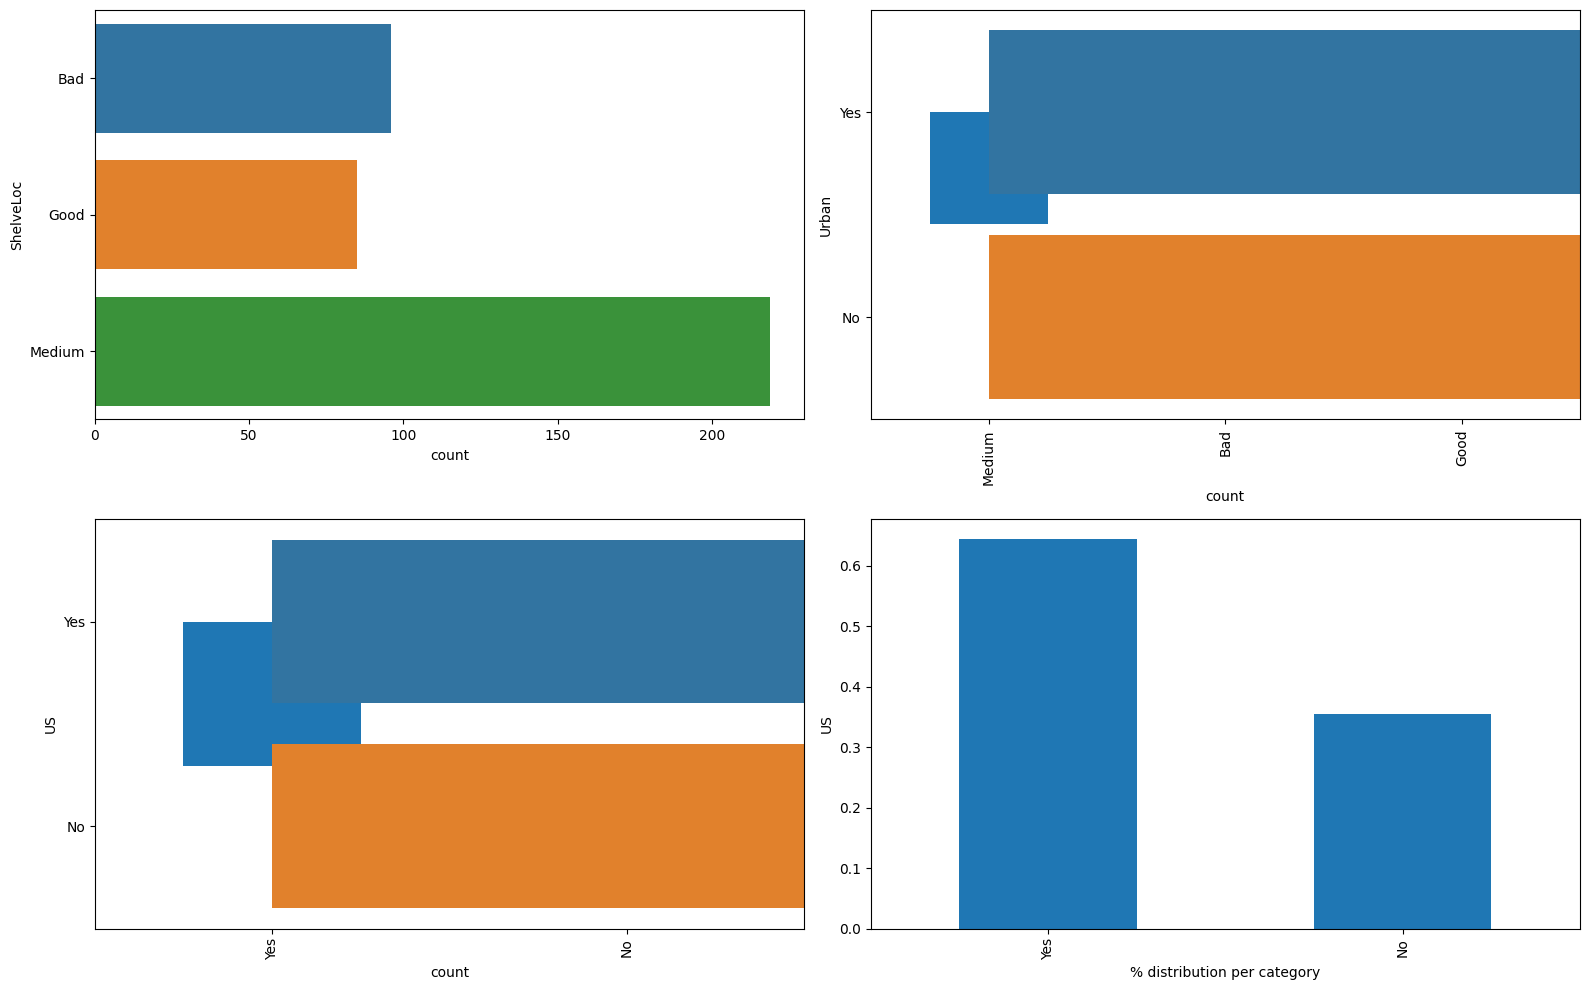

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [15]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

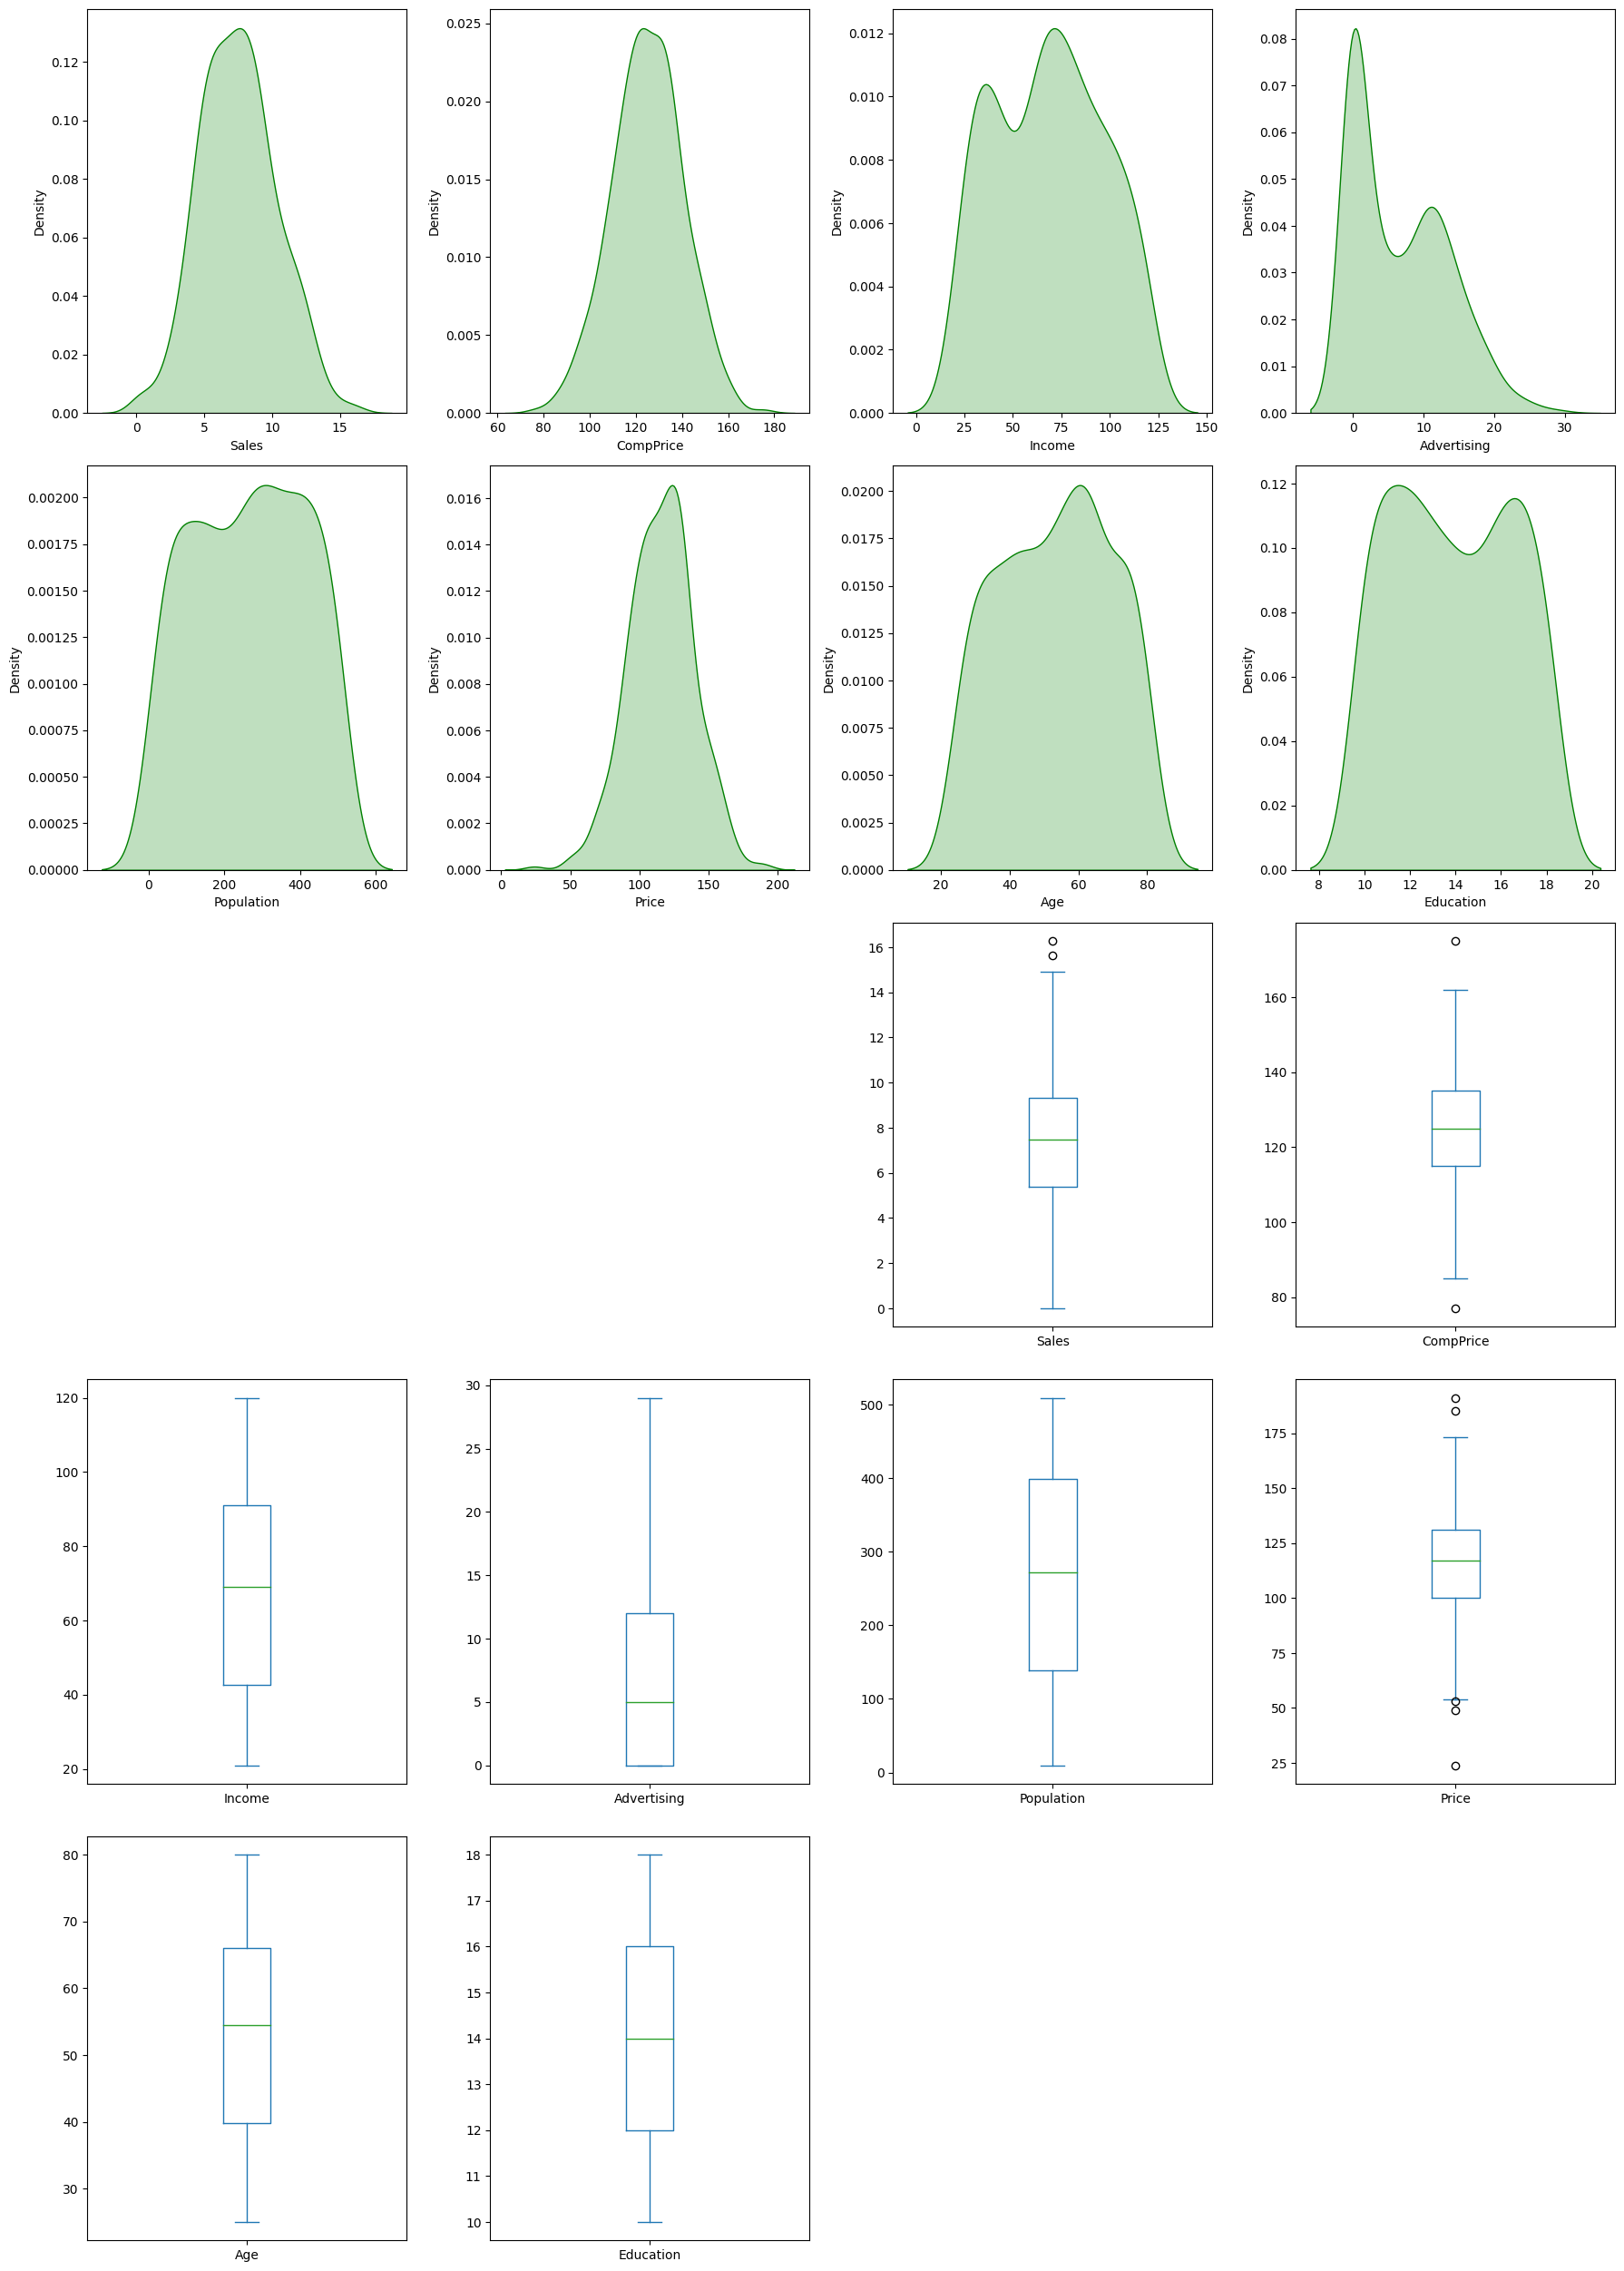

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
corr = df.corr()

In [20]:
df1 = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])

In [21]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [22]:
corr = df1.corr()

<Axes: >

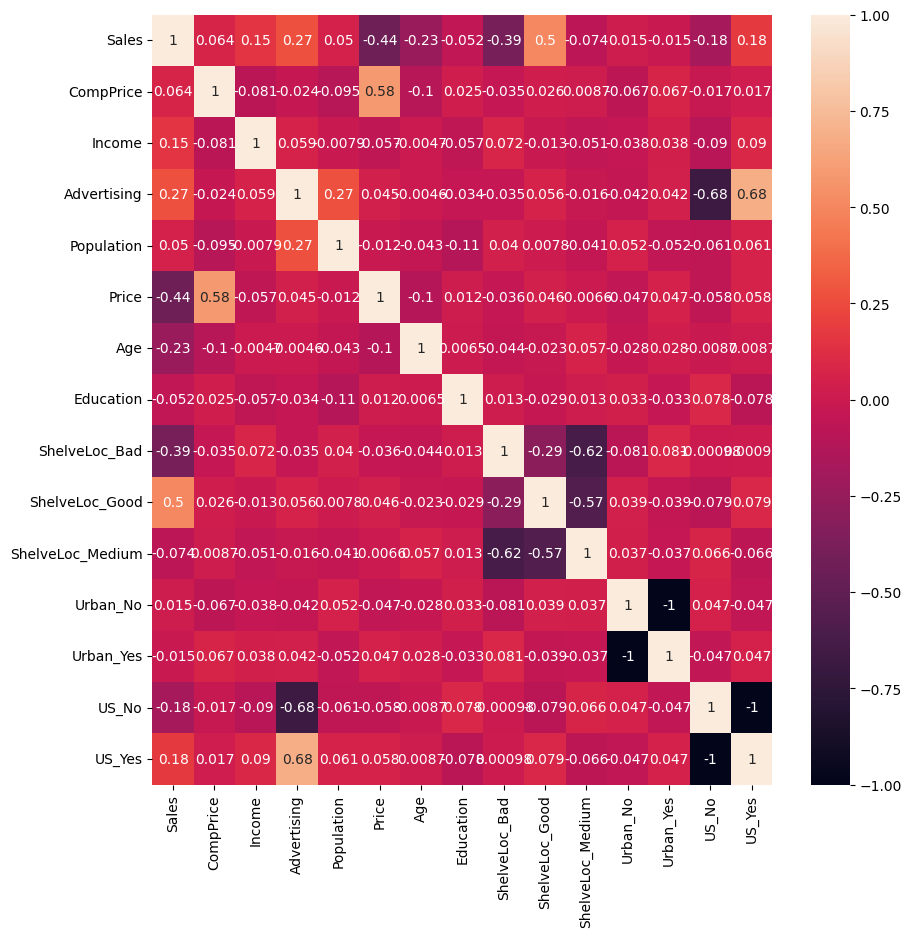

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

**Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"**

In [24]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)


In [25]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small


# **Splitting the data into Train and Test**

In [26]:
x = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [27]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [28]:
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [29]:
y.value_counts()

small    201
large    199
Name: sales, dtype: int64

**As we have balanced data in target column so we can directly build model without applying SMOTE.**

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

# **Preparing the Model : Decision Tree**

In [31]:
dec0=DecisionTreeClassifier(criterion='entropy',random_state=33,max_depth=None)
dec0.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [34]:
y_pred=dec0.predict(x_test)
y_pred

array(['small', 'large', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'large', 'large',
       'small', 'large', 'small', 'large', 'large', 'large', 'small',
       'large', 'small', 'small', 'large', 'large', 'large', 'large',
       'small', 'small', 'large', 'small', 'large', 'large', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'large', 'large', 'large', 'small',
       'small', 'small', 'large', 'large', 'small', 'large', 'large',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'large'], dtype=object)

In [35]:
accuracy_score(y_test,y_pred)

0.7125

**As we can see above when we kept max_depth=none then we got the model accuracy 71%.so now lets visualize it.**

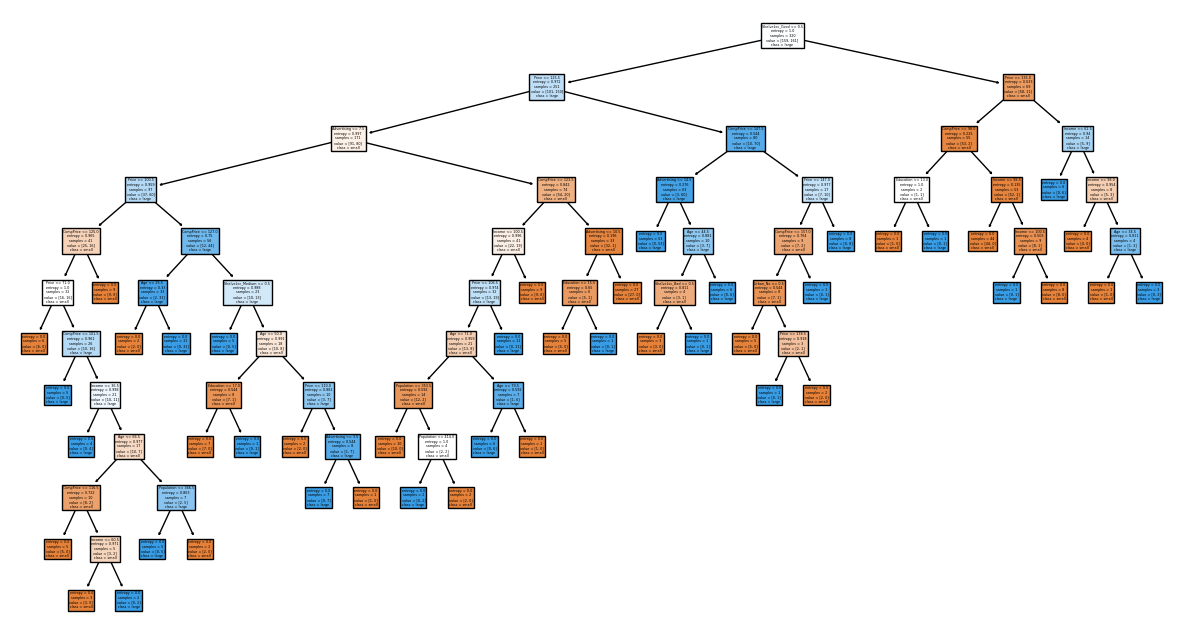

In [36]:
plt.figure(figsize=(15,8))
tree.plot_tree(dec0,feature_names=x.columns,class_names=['small', "large"],
                       filled=True)
plt.show()

# **Hyperparameter Tunning for decision tree by using Grid Search CV**

In [49]:
params = {
    'max_depth': [2, 3, 5, 6, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [50]:
grid_search = GridSearchCV(estimator=dec0,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1)

In [51]:
grid = grid_search.fit(x_train,y_train)

In [52]:
grid.best_score_

0.778125

In [53]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}

**So as we can see above the best accuracy score that we have got from Hyperparameter tunnig(Grid SearchCV) is 77% with the parameters max_depth=6,criterion=entropy and min_samples_leaf=5.**

**So now make the model using the parameters that we have got through Hyperparameter Tunning.**

# **Final Model**

In [61]:
dec1=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=5)
dec1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)

In [62]:
y_pred1=dec1.predict(x_test)
y_pred1

array(['large', 'large', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'large', 'large', 'small',
       'large', 'large', 'small', 'small', 'large', 'small', 'large',
       'large', 'small', 'small', 'large', 'large', 'large', 'large',
       'small', 'small', 'large', 'small', 'large', 'large', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'large', 'large', 'large', 'small',
       'large', 'small', 'large', 'large', 'small', 'large', 'large',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'large'], dtype=object)

In [63]:
accuracy_score(y_test,y_pred1)

0.7625

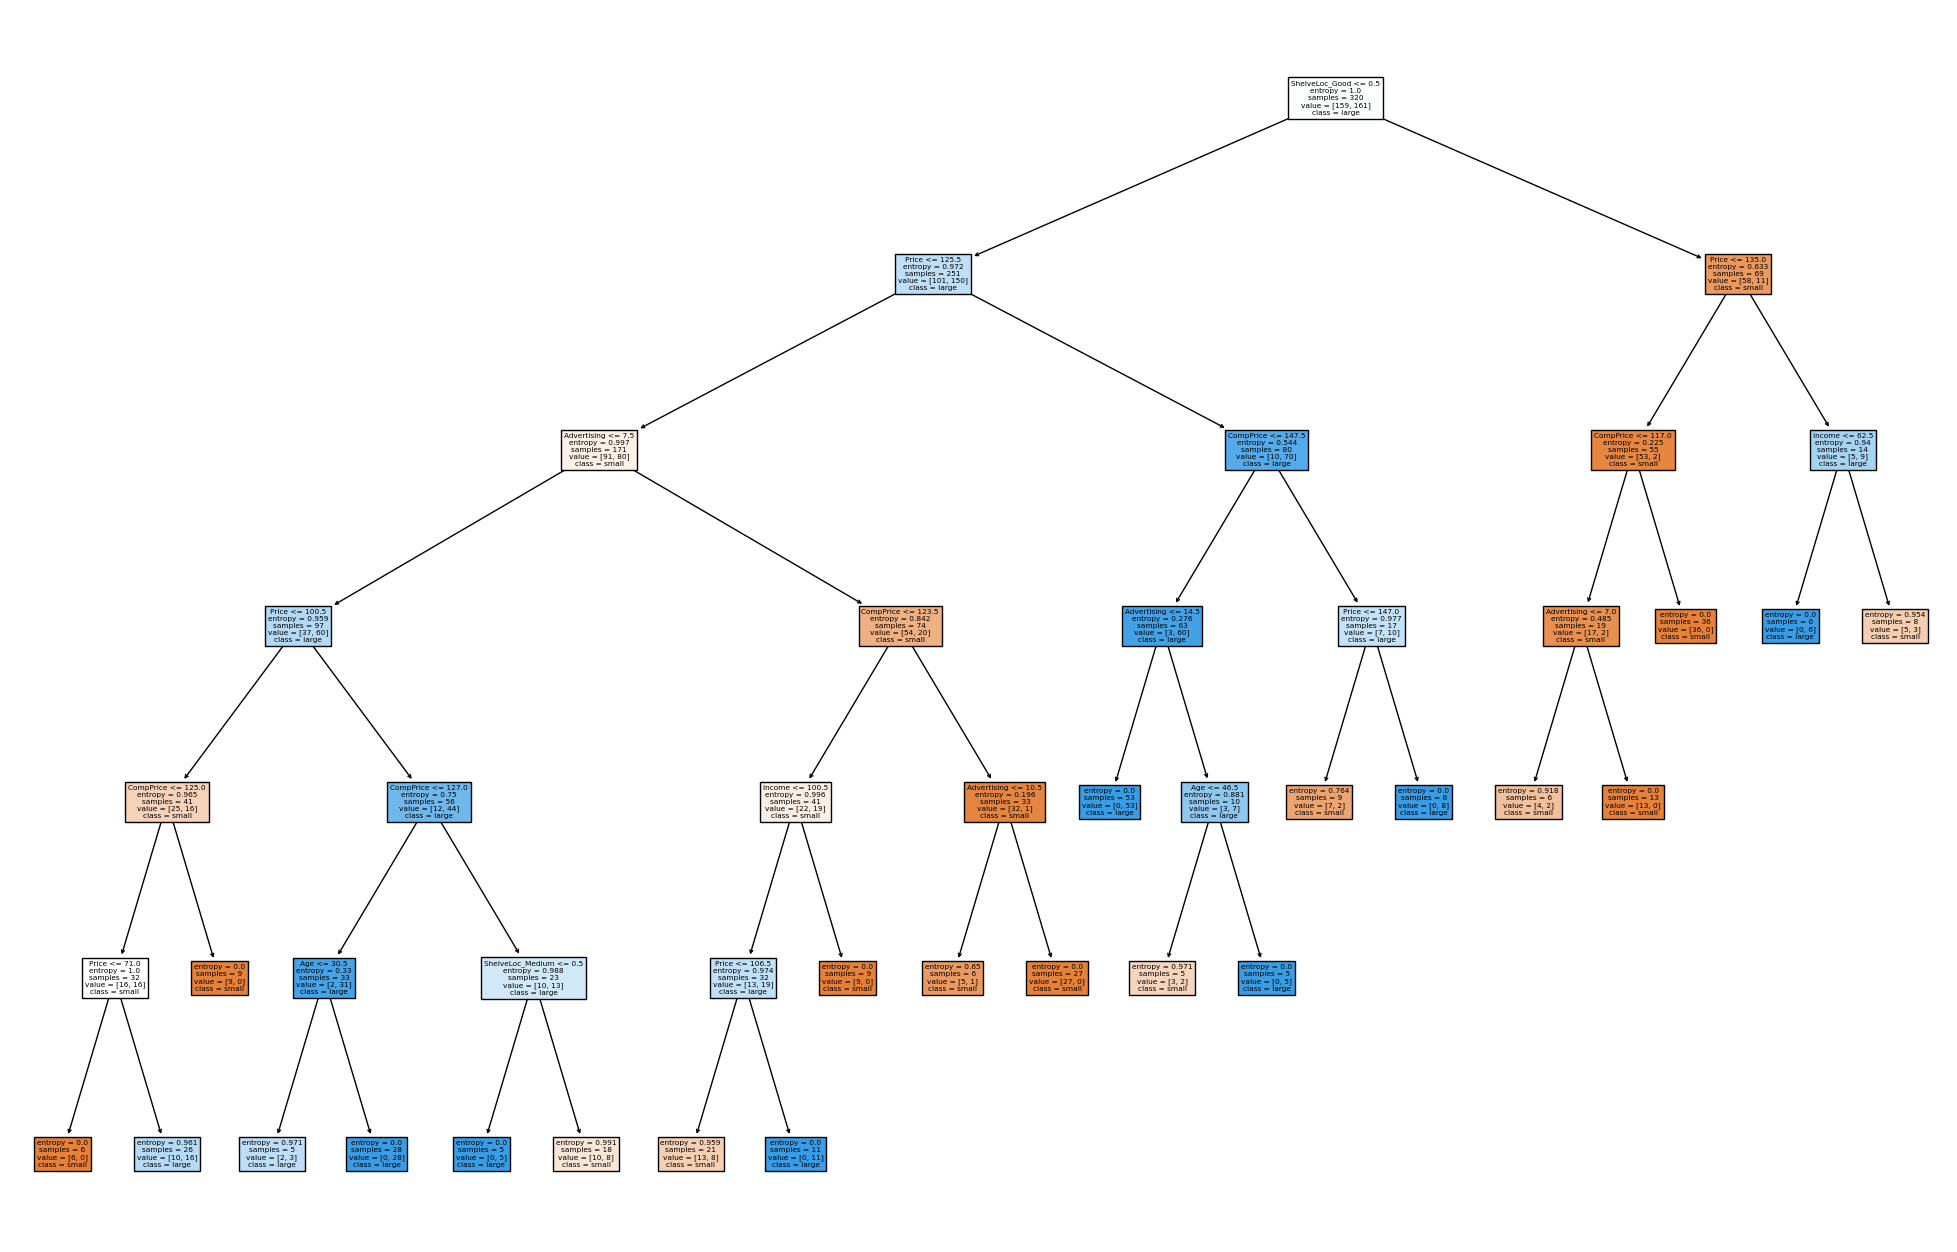

In [65]:
plt.figure(figsize=(25,16))
tree.plot_tree(dec1,feature_names=x.columns,class_names=['small', "large"],
                       filled=True)
plt.show()

In [66]:
dec1.feature_importances_

array([0.19503337, 0.06798033, 0.13442664, 0.        , 0.39158666,
       0.04471173, 0.        , 0.        , 0.14442735, 0.0218339 ,
       0.        , 0.        , 0.        , 0.        ])

In [67]:
fi1 = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': dec1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [68]:
fi1

,feature,importance
4,Price,0.391587
0,CompPrice,0.195033
8,ShelveLoc_Good,0.144427
2,Advertising,0.134427
1,Income,0.067980
5,Age,0.044712
9,ShelveLoc_Medium,0.021834
3,Population,0.000000
6,Education,0.000000
7,ShelveLoc_Bad,0.000000


In [69]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5best features

      Features       Score
4        Price  254.340301
2  Advertising  102.714381
5          Age   51.251305
1       Income   48.583713
3   Population   34.773600


**After analyzing the best features we will get to know that the top 3 factors affecting the sales are:**

1.price

2.shelf location at stores

3.Advertising